In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


# Categorical Feature
~ Name
~ Sex
~ Ticket
~ Cabin    
~ Embarked

In [5]:
# Name, Ticket, Cabin is seems irrelavent hence dropped
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [6]:
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,NaN,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


In [7]:
# converting categorical feature into Numerical Feature

genders = {'male' : 1, 'female' : 0}

data1 = [titanic_data]

for dataset in data1:
    dataset['Sex'] = dataset['Sex'].map(genders)

embarked = {"S": 0, "Q": 1, "C": 2}
data11 = [titanic_data]

for dataset in data11:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)
    

In [8]:
titanic_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,668.000000,668.000000,536.000000,668.000000,668.000000,668.000000,667.000000,668.000000
mean,2.296407,0.639222,29.700560,0.528443,0.407186,32.064552,0.473763,0.402695
std,0.831638,0.480586,14.240257,1.080327,0.854695,45.320835,0.805658,0.490808
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.000000,0.000000,0.000000,14.750000,0.000000,0.000000
75%,3.000000,1.000000,38.250000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


In [9]:
# Handling missing data in Age and Embarked

# For Age
mean = titanic_data['Age'].mean()
print(mean)


# For Embarked

mode = titanic_data["Embarked"].mode()
print(mode)

29.700559701492537
0    0.0
Name: Embarked, dtype: float64


In [10]:
titanic_data['Age'] = titanic_data["Age"].fillna(mean)

In [11]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(0)

In [12]:
titanic_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,0.639222,29.700560,0.528443,0.407186,32.064552,0.473054,0.402695
std,0.831638,0.480586,12.753571,1.080327,0.854695,45.320835,0.805263,0.490808
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.700560,0.000000,0.000000,14.750000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


<Axes: >

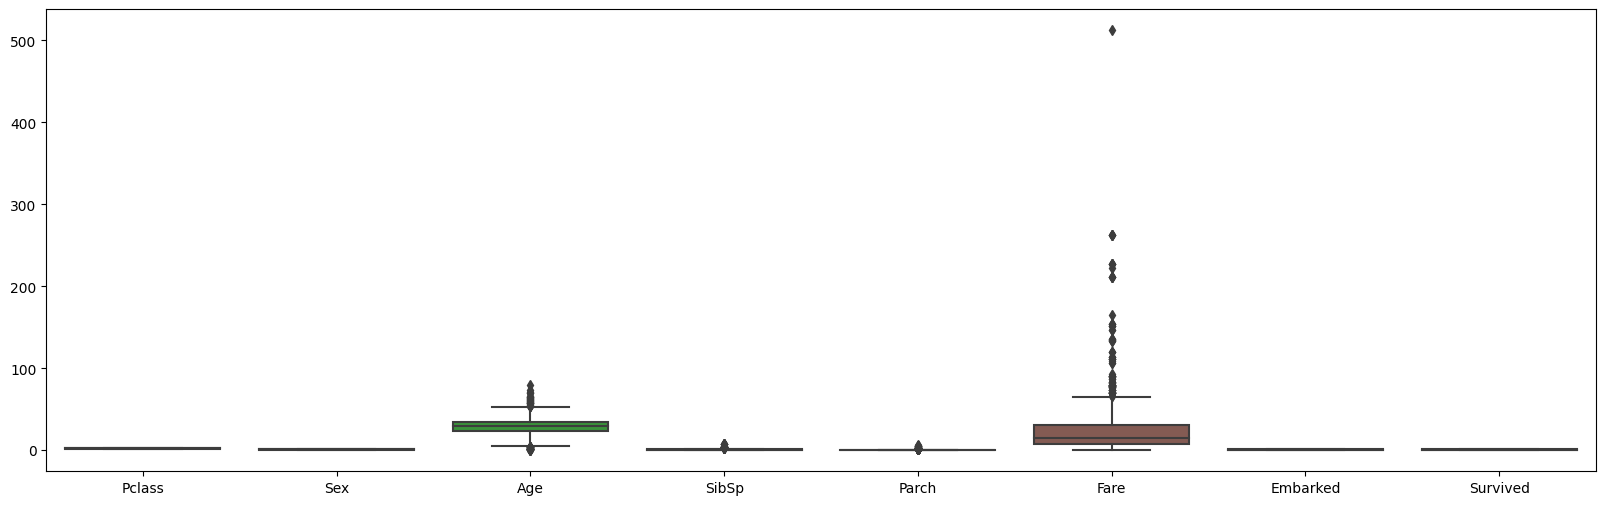

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=titanic_data, ax = ax)

In [14]:
threshold = 1.5
q1 = titanic_data['Fare'].quantile(0.25)
q3 = titanic_data['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Filter the data to exclude outliers
filtered_titanic_data_train = titanic_data[(titanic_data['Fare'] >= lower_bound) & (titanic_data['Fare'] <= upper_bound)]

In [15]:
threshold = 1.5
q1 = titanic_data['Age'].quantile(0.25)
q3 = titanic_data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Filter the data to exclude outliers
filtered_titanic_data_train = filtered_titanic_data_train[(titanic_data['Age'] >= lower_bound) & (titanic_data['Age'] <= upper_bound)]

<Axes: >

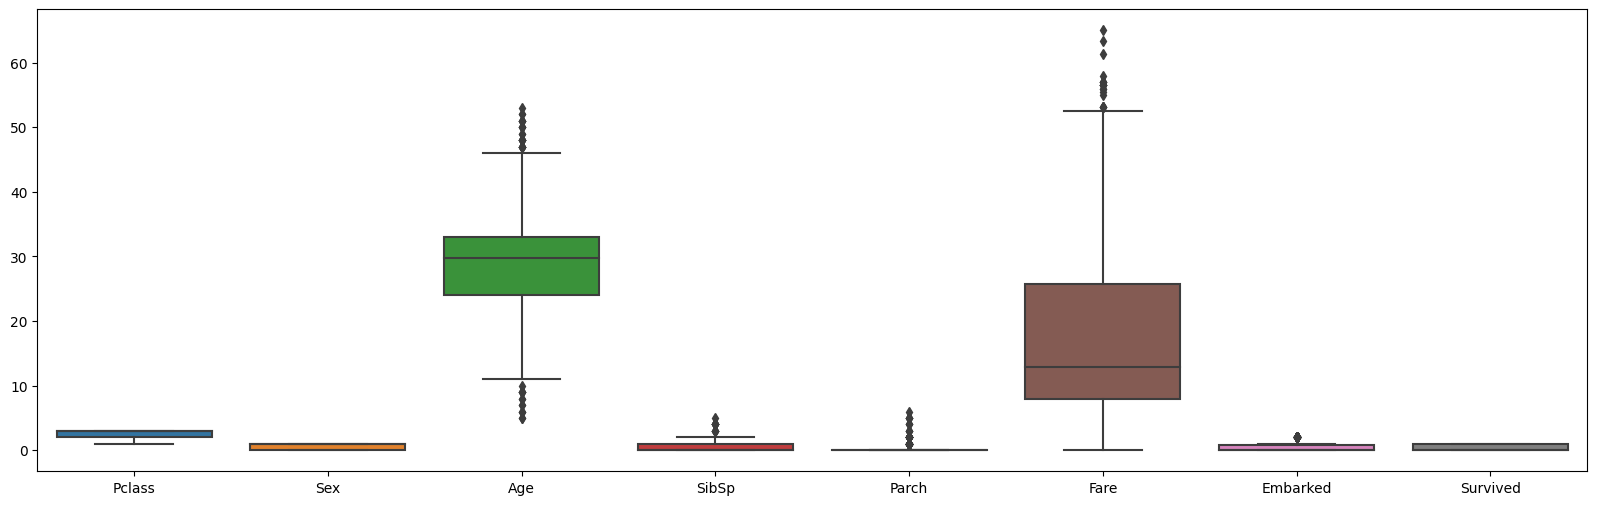

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=filtered_titanic_data_train, ax = ax)

In [17]:
# fiting the data in the Logistic Regression for training

x_train = filtered_titanic_data_train.drop(['Survived'], axis = 1)
y_train = filtered_titanic_data_train.filter(['Survived'], axis = 1)
print(x_train.shape)
print(y_train.shape)

(522, 7)
(522, 1)


#  Now for testing data

In [18]:

titanic_data_test = pd.read_csv('test.csv')

titanic_data_test.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [19]:
# Name, Ticket, Cabin is seems irrelavent hence dropped
titanic_data_test = titanic_data_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [20]:
# converting categorical feature into Numerical Feature

genders = {'male' : 1, 'female' : 0}

data2 = [titanic_data_test]

for dataset in data2:
    dataset['Sex'] = dataset['Sex'].map(genders)

embarked = {"S": 0, "Q": 1, "C": 2}
data21 = [titanic_data_test]

for dataset in data21:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [21]:
titanic_data_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,223.000000,223.000000,178.000000,223.000000,223.000000,223.000000,222.000000
mean,2.345291,0.672646,29.694775,0.506726,0.304933,32.622551,0.436937
std,0.850047,0.470303,15.398053,1.169700,0.634108,61.062047,0.750918
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,19.250000,0.000000,0.000000,7.879200,0.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,12.475000,0.000000
75%,3.000000,1.000000,37.750000,1.000000,0.000000,30.035400,1.000000
max,3.000000,1.000000,71.000000,8.000000,2.000000,512.329200,2.000000


In [22]:
# Handling missing data in Age and Embarked

# For Age
mean = titanic_data_test['Age'].mean()
print(mean)


# For Embarked

mode = titanic_data_test["Embarked"].mode()
print(mode)

29.694775280898877
0    0.0
Name: Embarked, dtype: float64


In [23]:
titanic_data_test['Age'] = titanic_data_test["Age"].fillna(mean)

In [24]:
titanic_data_test['Embarked'] = titanic_data_test['Embarked'].fillna(0)


In [25]:
titanic_data_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.345291,0.672646,29.694775,0.506726,0.304933,32.622551,0.434978
std,0.850047,0.470303,13.749153,1.169700,0.634108,61.062047,0.749796
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.879200,0.000000
50%,3.000000,1.000000,29.694775,0.000000,0.000000,12.475000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.035400,1.000000
max,3.000000,1.000000,71.000000,8.000000,2.000000,512.329200,2.000000


<Axes: >

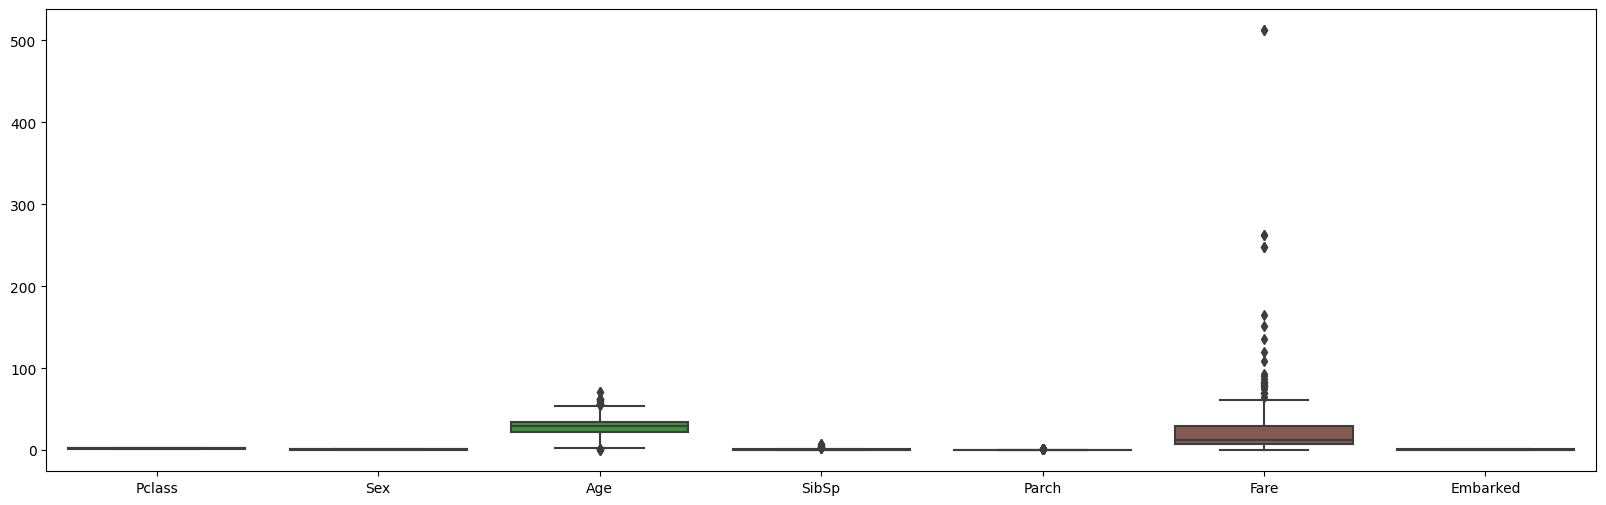

In [26]:

fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=titanic_data_test, ax = ax)

In [27]:
threshold = 1.5
q1 = titanic_data_test['Fare'].quantile(0.25)
q3 = titanic_data_test['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Filter the data to exclude outliers
filtered_titanic_data_test = titanic_data_test[(titanic_data_test['Fare'] >= lower_bound) & (titanic_data_test['Fare'] <= upper_bound)]

In [28]:
threshold = 1.5
q1 = titanic_data_test['Age'].quantile(0.25)
q3 = titanic_data_test['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Filter the data to exclude outliers
filtered_titanic_data_test = filtered_titanic_data_test[(titanic_data['Age'] >= lower_bound) & (titanic_data['Age'] <= upper_bound)]

<Axes: >

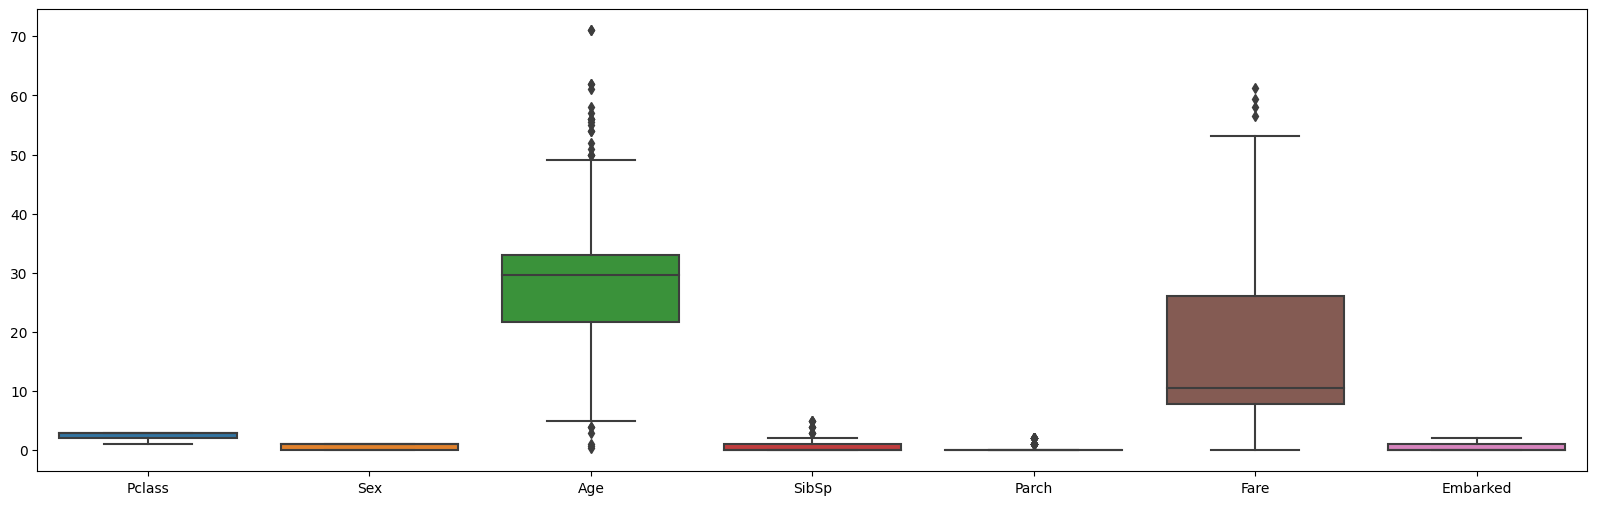

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=filtered_titanic_data_test, ax = ax)

In [30]:
x_test = filtered_titanic_data_test

print(x_test.shape)

(184, 7)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Doing standardization so that no attribute dominate over other due to its range
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# Regression analysis
lr = LogisticRegression()         
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
lr.score(X_train, y_train)

0.7931034482758621

In [36]:
prediction = lr.predict(X_test)

In [37]:
# Saving file through numpy
np.savetxt('standard.csv', prediction, delimiter = "," , fmt = "%.0f")

# Making Complex Dataset

In [38]:
titanic_data_complex = titanic_data.copy()


In [39]:
titanic_data_complex['Age**2'] = titanic_data_complex['Age']*titanic_data_complex['Age']
titanic_data_complex['Fare**2'] = titanic_data_complex['Fare']*titanic_data_complex['Fare']

In [40]:
titanic_data_complex.head().head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age**2,Fare**2
0,2,0,29.00000,1,0,26.000,0.0,1,841.000000,676.000000
1,3,1,29.70056,0,0,8.050,0.0,0,882.123247,64.802500
2,2,1,39.00000,0,0,26.000,0.0,0,1521.000000,676.000000
3,3,0,29.00000,0,4,21.075,0.0,0,841.000000,444.155625
4,3,1,25.00000,0,0,7.050,0.0,0,625.000000,49.702500


In [41]:
titanic_data_complex.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age**2,Fare**2
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,0.639222,29.700560,0.528443,0.407186,32.064552,0.473054,0.402695,1044.533315,3079.038766
std,0.831638,0.480586,12.753571,1.080327,0.854695,45.320835,0.805263,0.490808,867.842602,13087.818936
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.448900,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,529.000000,62.805625
50%,3.000000,1.000000,29.700560,0.000000,0.000000,14.750000,0.000000,0.000000,882.123247,217.625000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000,1225.000000,978.125625
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,6400.000000,262481.209173


In [42]:
# fiting the data in the Logistic Regression for training

x_train_complex = titanic_data_complex.drop(['Survived'], axis = 1)
y_train_complex = titanic_data_complex.filter(['Survived'], axis = 1)
print(x_train_complex.shape)
print(y_train_complex.shape)

(668, 9)
(668, 1)


For testing data

In [43]:
titanic_data_test_com = titanic_data_test.copy()

In [44]:
titanic_data_test_com['Age**2'] = titanic_data_test_com['Age']*titanic_data_test_com['Age']
titanic_data_test_com['Fare**2'] = titanic_data_test_com['Fare']*titanic_data_test_com['Fare']

In [45]:
titanic_data_test_com.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age**2,Fare**2
0,2,1,8.000000,1,1,36.7500,0.0,64.000000,1350.562500
1,1,0,49.000000,0,0,25.9292,0.0,2401.000000,672.323413
2,3,1,29.694775,0,0,7.7375,1.0,881.779679,59.868906
3,2,0,24.000000,2,1,27.0000,0.0,576.000000,729.000000
4,1,1,36.000000,0,0,26.2875,0.0,1296.000000,691.032656


In [46]:
x_test_complex = titanic_data_test_com

x_test_complex.shape

(223, 9)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss = StandardScaler()
X_train_complex = ss.fit_transform(x_train_complex)
X_test_complex = ss.transform(x_test_complex)

In [49]:
lr.fit(X_train_complex, y_train_complex)

LogisticRegression()

In [50]:
lr.score(X_train_complex, y_train_complex)

0.8023952095808383

In [51]:
prediction = lr.predict(X_test_complex)

In [52]:
np.savetxt('complex.csv', prediction, delimiter = "," , fmt = "%.0f")